In [ ]:
import pandas as pd

In [ ]:
# Upload
from google.colab import files
uploaded = files.upload()

# Save uploaded file(s)
for filename in uploaded.keys():
    print(f"User uploaded file: {filename}")


Saving euhnBv.csv to euhnBv.csv
User uploaded file: euhnBv.csv


In [ ]:
df=pd.DataFrame(pd.read_csv("euhnBv.csv"))

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 6)

In [ ]:
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'suptitle'

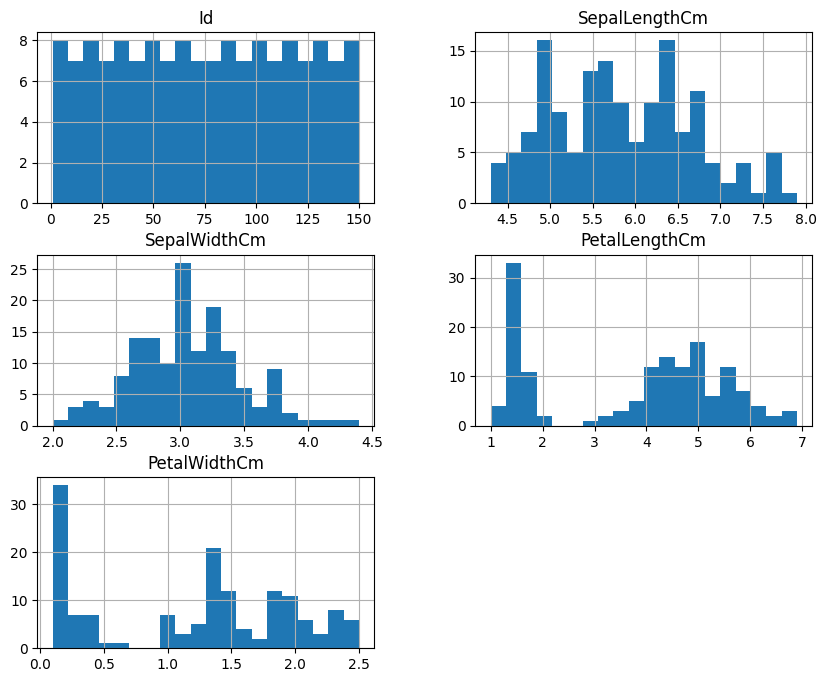

In [ ]:
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

In [ ]:
import sklearn as sns

In [ ]:
import matplotlib.pyplot as plt


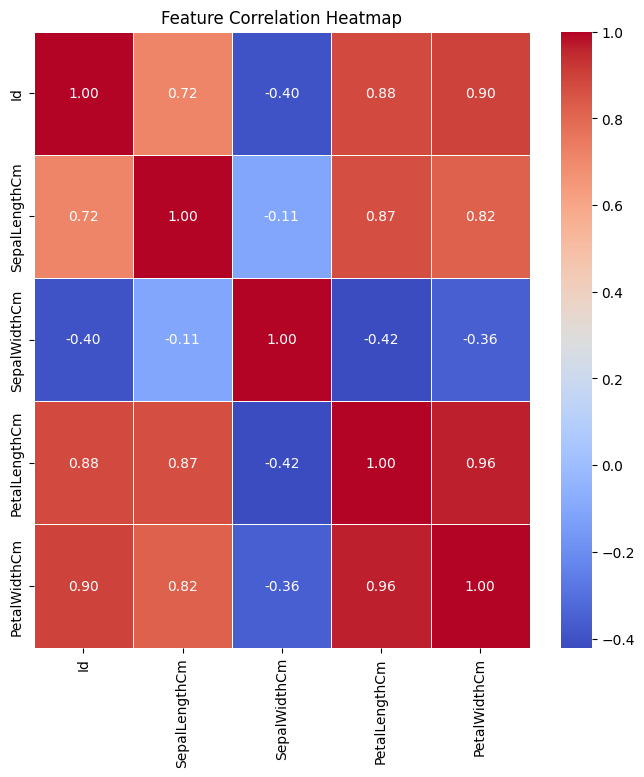

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Visualize correlations
plt.figure(figsize=(8, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Species', axis=1)
y=df['Species']
X_train, X_test,y_train, y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42
)

In [ ]:
print("Training set size",X_train.shape)
print("testing set size", X_test.shape)

Training set size (105, 5)
testing set size (45, 5)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("\n Classification Report",classification_report(y_test,y_pred))


Accuracy 1.0

 Classification Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



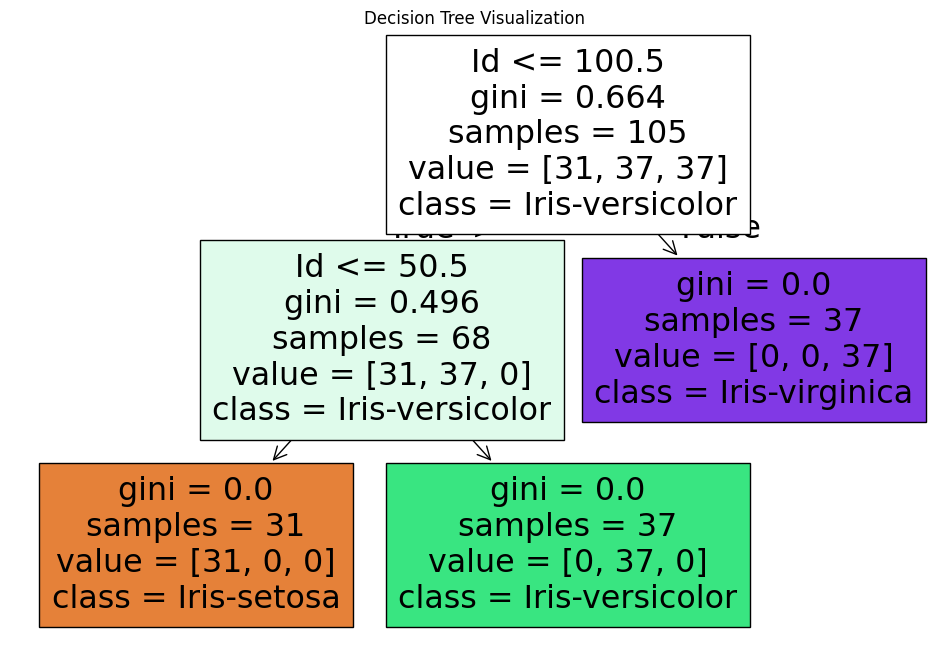

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.title("Decision Tree Visualization")
plt.show()


✅ Accuracy Score: 1.0

🔍 Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


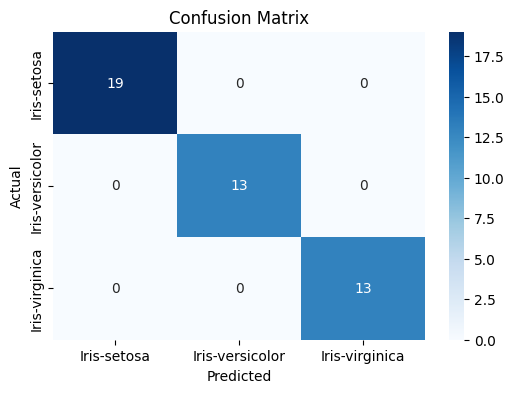


📋 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions
y_pred = model.predict(X_test)

# Step 2: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", accuracy)

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔍 Confusion Matrix:\n", cm)

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 4: Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different parameter settings
params = [
    {"criterion": "gini", "max_depth": None, "min_samples_split": 2},
    {"criterion": "entropy", "max_depth": None, "min_samples_split": 2},
    {"criterion": "gini", "max_depth": 3, "min_samples_split": 2},
    {"criterion": "entropy", "max_depth": 3, "min_samples_split": 2},
    {"criterion": "gini", "max_depth": 5, "min_samples_split": 5},
    {"criterion": "entropy", "max_depth": 5, "min_samples_split": 10},
]

# Run experiments
for p in params:
    clf = DecisionTreeClassifier(**p, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Params: {p}")
    print(f" Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}\n")


Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
 Train Accuracy: 1.000 | Test Accuracy: 1.000

Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
 Train Accuracy: 1.000 | Test Accuracy: 0.978

Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
 Train Accuracy: 0.952 | Test Accuracy: 1.000

Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
 Train Accuracy: 0.952 | Test Accuracy: 0.978

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
 Train Accuracy: 0.981 | Test Accuracy: 1.000

Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
 Train Accuracy: 0.971 | Test Accuracy: 1.000



In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.3 MB/s eta 0:00:00


In [ ]:
# streamlit_app.py

import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Title
st.title("🌸 Iris Decision Tree Classifier")

# Upload CSV
uploaded_file = st.file_uploader("Upload your Iris CSV file", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("📊 Dataset Preview:")
    st.dataframe(df)

    # Train-test split
    X = df.drop("Species", axis=1)
    y = df["Species"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    st.success(f"✅ Accuracy: {acc:.2f}")

    # Classification report
    st.subheader("📋 Classification Report")
    st.text(classification_report(y_test, y_pred))

    # Decision Tree Plot
    st.subheader("🌳 Decision Tree Visualization")
    fig, ax = plt.subplots(figsize=(10, 6))
    tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, ax=ax)
    st.pyplot(fig)


2025-10-03 19:27:35.723 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:27:36.029 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-03 19:27:36.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:27:36.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:27:36.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:27:36.042 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:27:36.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:27:36.045 Thread 'MainThread': mi

In [ ]:
!pip install streamlit pyngrok


In [ ]:
!pip install streamlit pyngrok


In [ ]:
code = """# streamlit_app.py

import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Title
st.title("🌸 Iris Decision Tree Classifier")

# Upload CSV
uploaded_file = st.file_uploader("Upload your Iris CSV file", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write("📊 Dataset Preview:")
    st.dataframe(df)

    # Train-test split
    X = df.drop("Species", axis=1)
    y = df["Species"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    st.success(f"✅ Accuracy: {acc:.2f}")

    # Classification report
    st.subheader("📋 Classification Report")
    st.text(classification_report(y_test, y_pred))

    # Decision Tree Plot
    st.subheader("🌳 Decision Tree Visualization")
    fig, ax = plt.subplots(figsize=(10, 6))
    tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_, ax=ax)
    st.pyplot(fig)
"""
with open("streamlit_app.py", "w") as f:
    f.write(code)


In [ ]:
!ngrok config add-authtoken $2zPsyvEgfyCsMA10TOBi0dPDRfW_XNVXjsxsgjskLFQdU9kv

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import subprocess
import time
from pyngrok import ngrok

# Start Streamlit app
process = subprocess.Popen(["streamlit", "run", "streamlit_app.py"])

# Wait for Streamlit to boot up
time.sleep(5)

# Create ngrok tunnel
public_url = ngrok.connect(port=8501)
print("🌐 Streamlit app is live at:", public_url)


ERROR:pyngrok.process.ngrok:t=2025-10-03T19:58:14+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified is properly formed, but it is invalid.\nYour authtoken: zPsyvEgfyCsMA10TOBi0dPDRfW_XNVXjsxsgjskLFQdU9kv\nThis usually happens when:\n    - You reset your authtoken\n    - Your authtoken was for a team account that you were removed from\n    - You are using ngrok link and this credential was explicitly revoked\nGo to your ngrok dashboard and double check that your authtoken is correct:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_107\r\n"
ERROR:pyngrok.process.ngrok:t=2025-10-03T19:58:14+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: The authtoken you specified is properly formed, but it is invalid.\nYour authtoken: zPsyvEgfyCsMA10TOBi0dPDRfW_XNVXjsxsgjskLFQdU9kv\nThis usually happens when:\n    - You reset your authtoken\n    - Your authtoken was for 

PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified is properly formed, but it is invalid.\nYour authtoken: zPsyvEgfyCsMA10TOBi0dPDRfW_XNVXjsxsgjskLFQdU9kv\nThis usually happens when:\n    - You reset your authtoken\n    - Your authtoken was for a team account that you were removed from\n    - You are using ngrok link and this credential was explicitly revoked\nGo to your ngrok dashboard and double check that your authtoken is correct:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_107\r\n.

In [ ]:
!ngrok config add-authtoken $2zPsyvEgfyCsMA10TOBi0dPDRfW_XNVXjsxsgjskLFQdU9kv

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ls


euhnBv.csv  sample_data  streamlit_app.py


In [ ]:
with open("streamlit_app.py", "w") as f:
    f.write("""
import streamlit as st
st.title("Hello Javeria 👋")
st.write("If you see this, Streamlit is working!")
""")
